#### PCA

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plots_lib import plot_pca_scatter

In [75]:
Z_df = pd.read_csv('amazon-books-continuous-standardised.csv', index_col=0)

Z_df.head()
column_names = list(Z_df.columns)
Z_df_active = Z_df.drop(['thick', 'weight', 'npages'], axis=1)
column_names_no_price = list(Z_df_active.columns)

prices = Z_df.drop(column_names_no_price, axis=1)
price_col_names = list(prices.columns)

In [76]:
Z_df_active.head()

,listPrice,amazonPrice,height,width
0,-0.374988,-0.638617,-0.382130,-0.062467
1,-0.220468,-0.204595,0.309485,-0.062467
2,-1.238039,-0.956785,0.194216,-0.417844
3,-0.145846,-0.146668,0.770561,0.529828
4,0.947855,0.363437,-0.151592,-0.417844


In [77]:
Z = np.array(Z_df_active)
n, p = Z.shape[0], Z.shape[1]

corr_mat = np.matmul(Z.T, Z) / n

print(corr_mat.shape)

(4, 4)


In [78]:

def plot_correlation_heatmap(corr_matrix, column_names=None):
	plt.figure(figsize=(10, 8))
	if column_names:
		sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
			cbar=True, square=True, linewidths=0.5, vmin=-1, vmax=1,
			xticklabels=column_names, yticklabels=column_names)
	else:
		sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
			cbar=True, square=True, linewidths=0.5, vmin=-1, vmax=1)


	
	plt.title('Correlation Matrix Heatmap')
	plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
	plt.yticks(rotation=0)  # Keep y-axis labels horizontal
	plt.show()

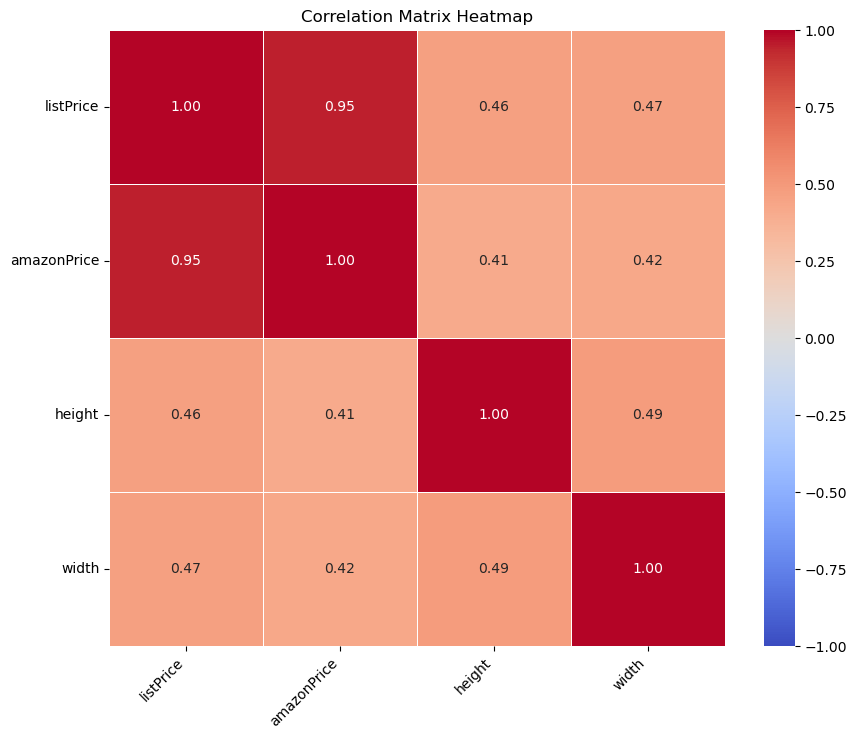

In [79]:
plot_correlation_heatmap(corr_mat, column_names_no_price)

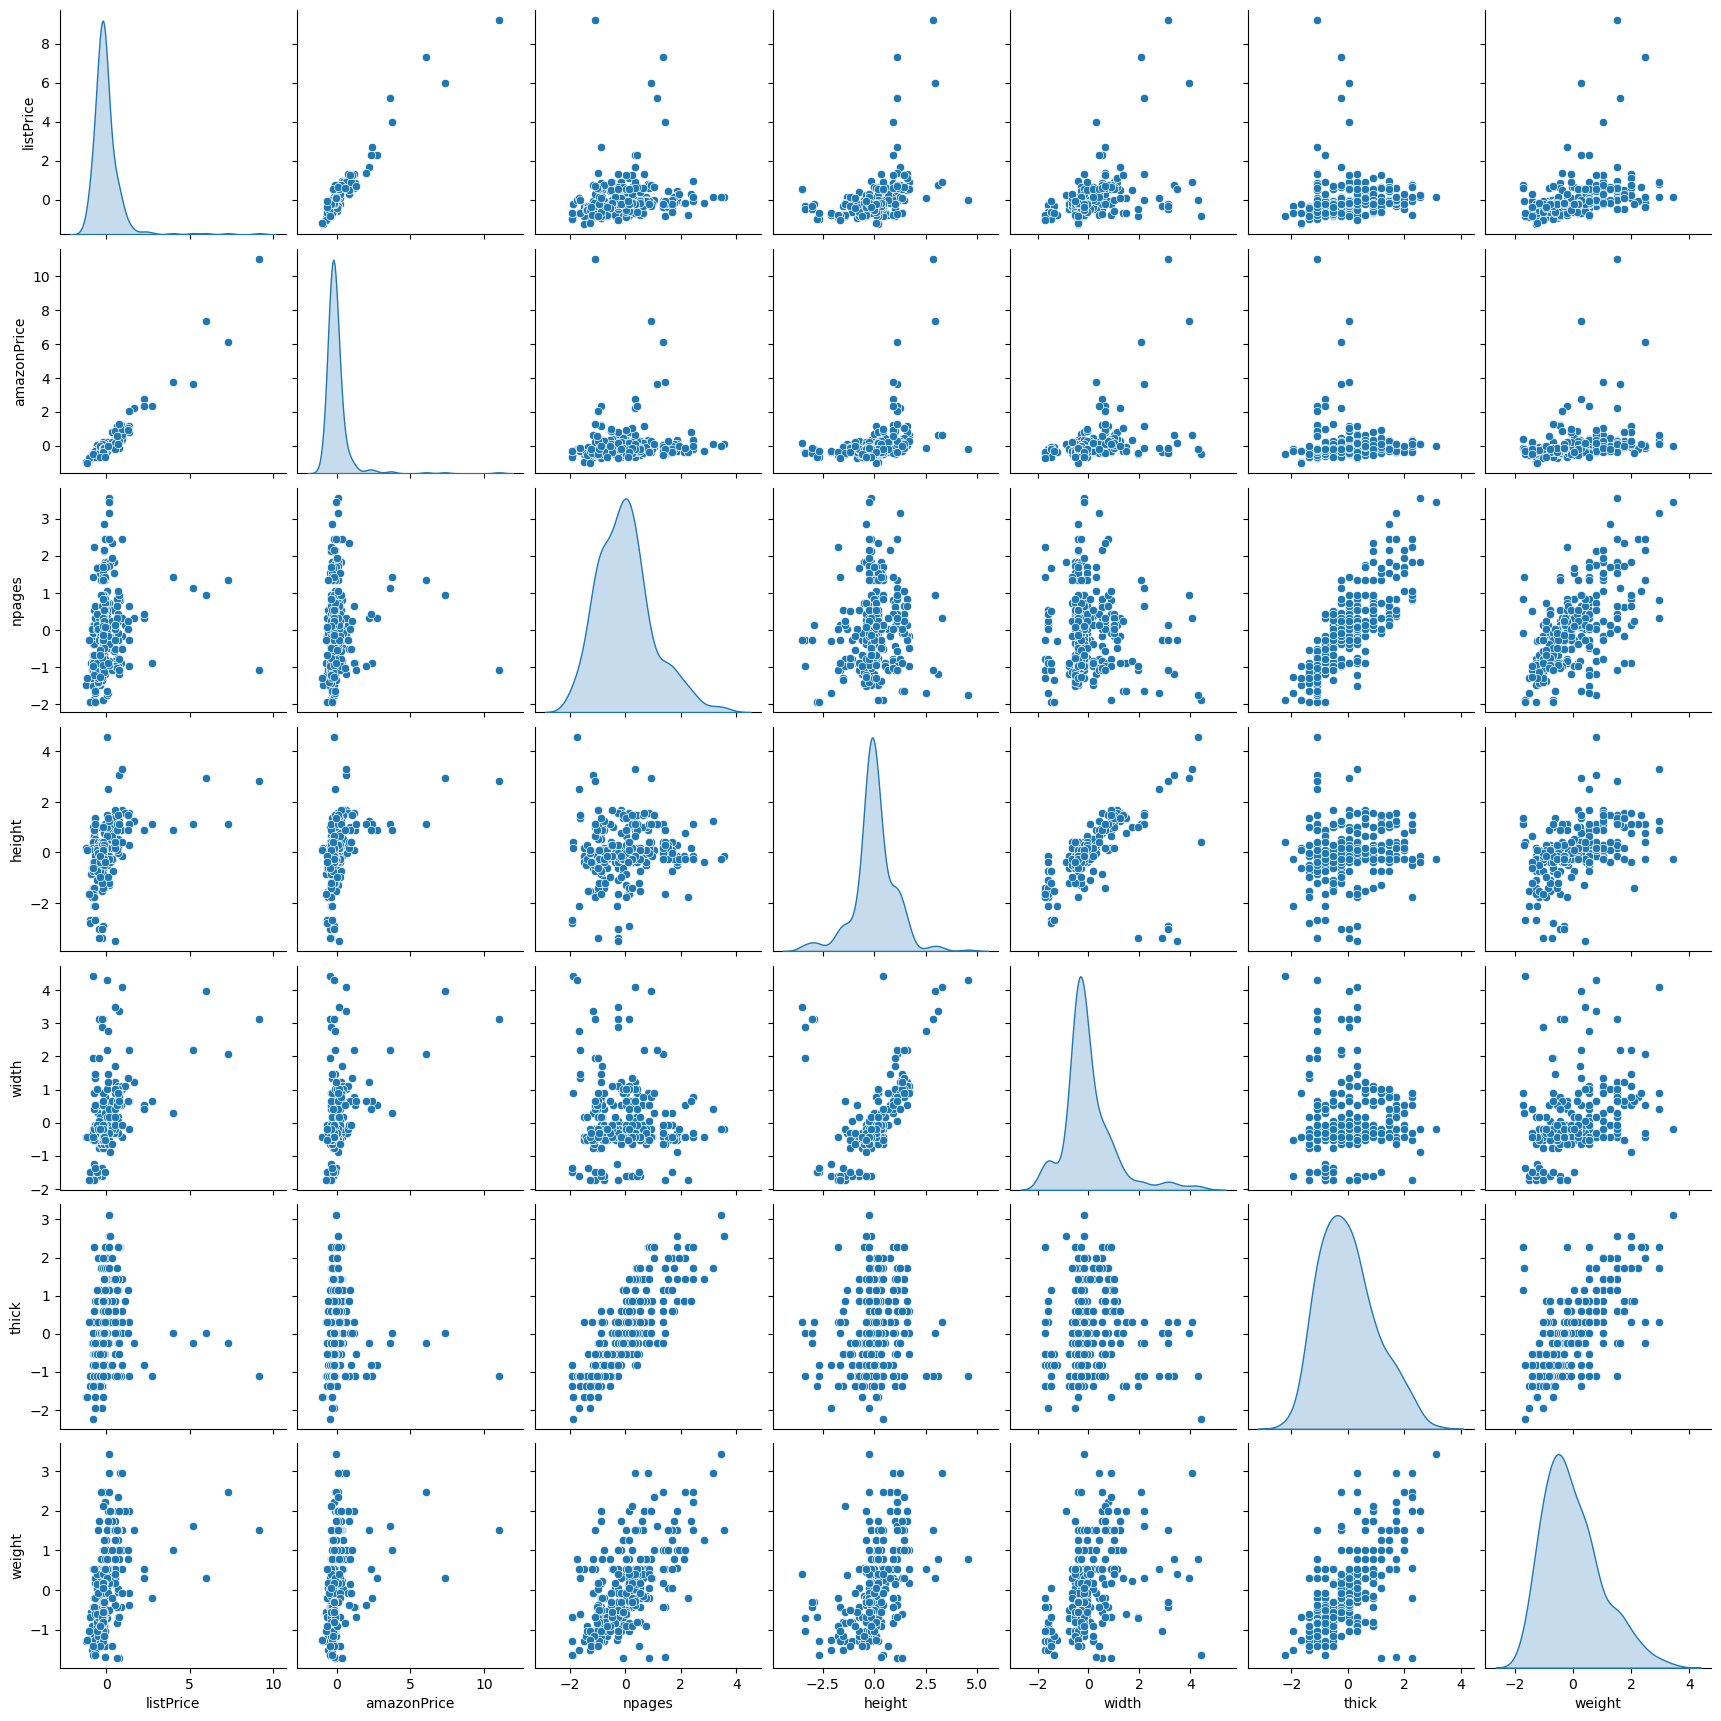

In [80]:
from plots_lib import display_pairplot

display_pairplot(Z_df)

In [81]:
eig_things = np.linalg.eig(corr_mat)
lambdas, eigenvector = eig_things[0], eig_things[1]
print(lambdas.shape)

(4,)


In [82]:
eig_vec_df = pd.DataFrame(eigenvector, columns=[f'u_{k}' for k in range(p)])

eig_val_df = pd.DataFrame(lambdas.reshape((1, len(lambdas))), columns=[f'l_{k}' for k in range(p)])


eig_vec_df.to_csv('amazon-books-eigenvector.csv') 
eig_val_df.to_csv('amazon-books-eigenvalues.csv') 

In [83]:
F = np.matmul(Z, eigenvector)
F.shape


(311, 4)

In [84]:
amazon_book_clean_df = pd.read_csv('amazon-books-clean.csv', index_col=0)
factorial_axis_label = [f'F{i}' for i in range(F.shape[1])]

F_df = pd.DataFrame(F, columns=factorial_axis_label, index=range(len(F)))

merge = pd.concat([amazon_book_clean_df, F_df], axis=1)

merge.to_csv('amazon-books-factorial.csv')


In [85]:
# quick check
print('variance on factorial axis = \t', np.var(F, axis=0))
print('lambdas = \t\t\t', lambdas)

variance on factorial axis = 	 [2.62735722 0.04501923 0.80706016 0.50770166]
lambdas = 			 [2.62735722 0.04501923 0.80706016 0.50770166]


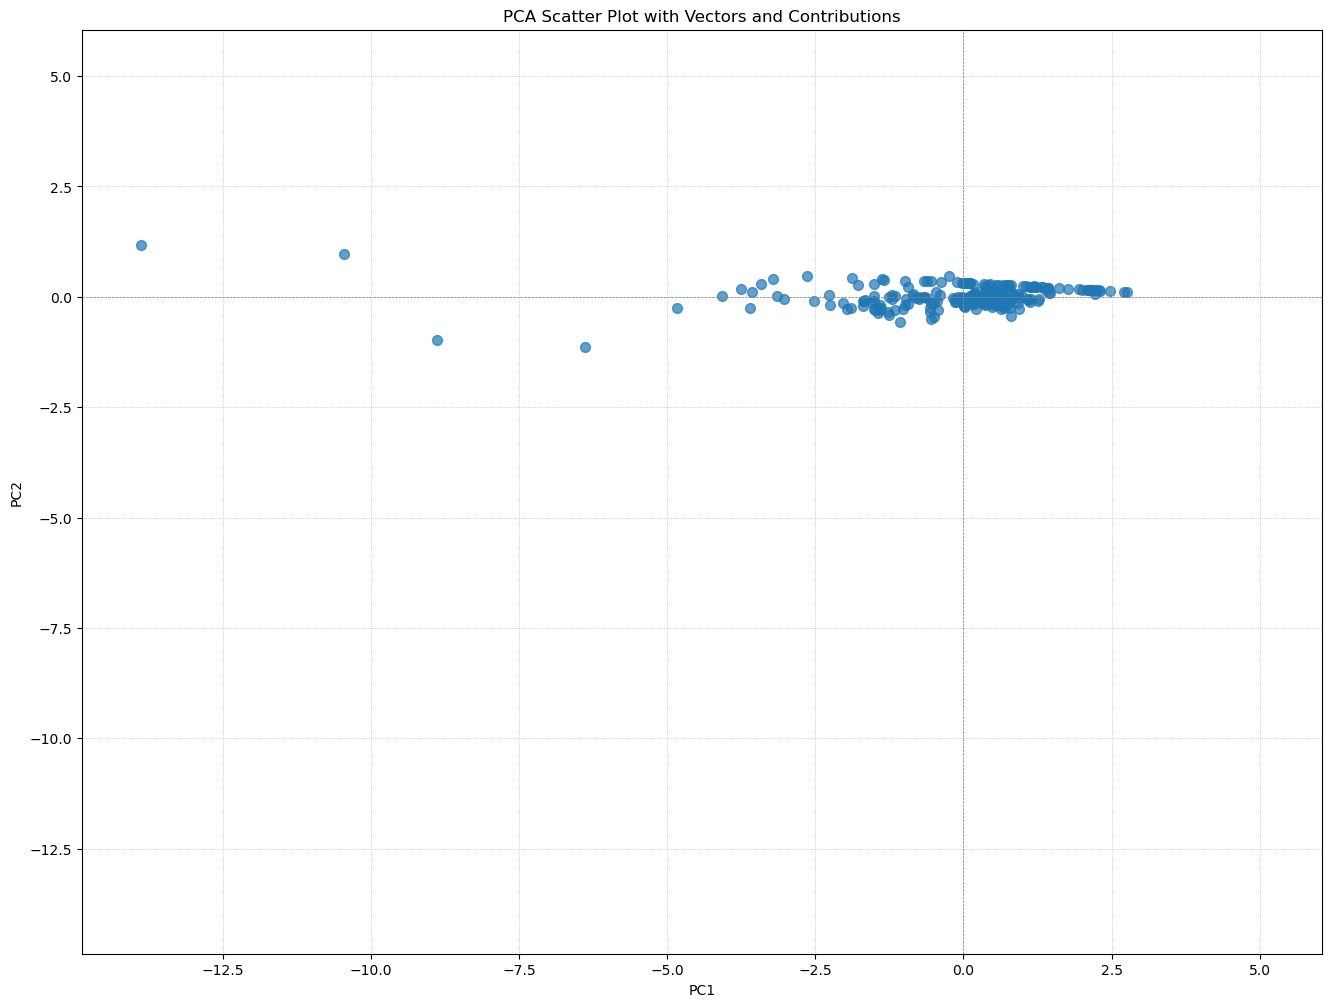

In [86]:
plot_pca_scatter(F * -1, figsize=(16, 12))

### CHECKING MY PCA
##### You can see that some of the factorial axis are opposed sign, it is due to the PCA algorithme that optimise the projected variance wich is a quared value so the solutions can be both in the positive and negative, the important is that it is consistent

In [87]:
# CHECKING THAT MY PCA IS THE SAME AS sklearn PCA
from sklearn.decomposition import PCA

pca = PCA()

ret = pca.fit_transform(Z)

for r1, r2 in zip(ret[0:5, :], F[0:5, :]):
    print(r1, r2)

[-0.75617821 -0.19343477  0.23236676 -0.18750072] [-0.75617821  0.18750072 -0.19343477  0.23236676]
[-0.1322973  -0.32743701 -0.25420357  0.02848036] [-0.1322973  -0.02848036 -0.32743701 -0.25420357]
[-1.32882754 -0.82365886 -0.40475     0.22906538] [-1.32882754 -0.22906538 -0.82365886 -0.40475   ]
[ 0.39778679 -0.85674093 -0.15046248  0.04885132] [ 0.39778679 -0.04885132 -0.85674093 -0.15046248]
[ 0.4914341   0.85874631 -0.21587148 -0.45003967] [ 0.4914341   0.45003967  0.85874631 -0.21587148]
